# Producing Plots:
## 1. Box and whiskers of genre vs. ROI
## 2. Boxplot of revenue vs. genre
## 3. Scatter of ROI vs. budget for 3 genres + depicting the relevant correlation coefficients
## 4. Pie chart depicting the ratio of the 3 genres vs. the entire market
IMPORTANT NOTES: 
- Cannot be run on learn-env environment. Up-to-date pandas version is required to read the pickle file due to changes that were made when adjusting the budget for inflation. 
- The box and whisker plots are formatted for viewing within the notebook
- The pie charts, barchart are formatted for figure saving and not being seen well within the notebook
- The scatter plots are just for reference and just to know that correlations between ROI and budget are non-existent

Hex color keys: '#eb5600', '#c2882b', '#6aa4c8'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Reading the master dataset df and editing it according to plotting needs:

- worldwide_gross != 0

In [2]:
master_df = pd.read_pickle('movie_master_dataset_with_inflation.pkl')
master_df = master_df[master_df['worldwide_gross'] != 0]

## Creating dataframe with no duplicate movies

And getting the total sum of the top 3 genres' worldwide revenue

In [3]:
no_duplicates_df = master_df.drop_duplicates(subset=['movie','inf_adj_production_budget'])

### Printing out the total market revenue, non-top 3 genre revenue, and top 3 genre revenue

In [4]:
# Getting the revenue of the top 3 genres using conditions in the dataframe
all_3_genres = no_duplicates_df[(no_duplicates_df['Action'] == True) | (no_duplicates_df['Adventure'] == True) | 
                 (no_duplicates_df['Comedy'] == True)]['worldwide_gross'].sum()

# Getting a dataframe with no overlaps of the top 3 genres
overlaps = no_duplicates_df[((no_duplicates_df['Action'] == True) & (no_duplicates_df['Adventure'] == True)) 
                            | ((no_duplicates_df['Action'] == True) & (no_duplicates_df['Comedy'] == True)) 
                            | ((no_duplicates_df['Adventure'] == True) & (no_duplicates_df['Comedy'] == True))]

# Calculating the 3 different revenues
total_market_revenue = no_duplicates_df['worldwide_gross'].sum()
act_adv_com_revenue = all_3_genres.sum() - overlaps['worldwide_gross'].sum() # Dealing with overlapping movies
rest_of_market_revenue = total_market_revenue-act_adv_com_revenue

# Printing the different revenues
print("The worldwide revenue of the total market is: " + str(total_market_revenue))
print("The worldwide revenue of the rest of the market is: " +str(rest_of_market_revenue))
print("The worldwide revenue of the top 3 genres is: " + str(act_adv_com_revenue))

The worldwide revenue of the total market is: 209357417789
The worldwide revenue of the rest of the market is: 150307661657
The worldwide revenue of the top 3 genres is: 59049756132


# Producing box and whisker plots using the produce_boxplot function
## For ROI vs genre
Note: Must be using up-to-date Python3 for this to work. Do not use learn-env environment

In [5]:
def produce_boxplot(master, budgetmin, budgetmax=1e9, movie_count_thresh=100, ylim=(-1.5,30), fig_file_name = None):
    '''
    Produces a boxplot with inputs:
        master - the master dataframe as pandas df
        budgetmin - an int of the minimum movie budget for the data
        budgetmax - an int of the maximum movie budget for the data (default = 1e9)
        movie_count_thresh - the minimum number of movies per genre required for plotting (default = 100)
        ylim - the limits of the y axis a tuple -> (min, max)
        
    Returns None
    Spits out boxplots
    '''
    
    
    # Df with no duplicates
    no_duplicates_df = master.drop_duplicates(subset=['movie','inf_adj_production_budget'])
    
    # List with all genre names
    genre_names = master_df.columns.tolist()[10:]
    
    # Df with minimum budget and no duplicates
    budget_min_df = no_duplicates_df[(no_duplicates_df['inf_adj_production_budget'] >= budgetmin) 
                                     & (no_duplicates_df['inf_adj_production_budget'] < budgetmax)]
    
    # Creating list of genres where there are at least movie_count_thresh number of movies
    remaining_genres = []
    for genre in genre_names:
        if budget_min_df[genre].sum() > movie_count_thresh:
            remaining_genres.append(genre)
    
    # Get list of column names and get list of total movies for that column
    col_names_desc = [names for counts, names in sorted(zip(budget_min_df[remaining_genres].sum().values.tolist(), 
                                               budget_min_df[remaining_genres].sum().index.tolist()), reverse=True)]
    col_counts_desc = [counts for counts, names in sorted(zip(budget_min_df[remaining_genres].sum().values.tolist(), 
                                               budget_min_df[remaining_genres].sum().index.tolist()), reverse=True)]
    
    # Labels for x axis
    plt_x_labels = [ str(x) + ' - ' + str(y) for x, y in zip(col_names_desc, col_counts_desc)]
    
    # Plotting box and whiskers
    fig, ax = plt.subplots(figsize=(12,7))
    ax.boxplot([budget_min_df[budget_min_df[col] == True]['ROI'] for col in col_names_desc], 
           labels=plt_x_labels)
    ax.set_ylim(ylim)
    ax.set_title('ROI Boxplot for Genres with Budget \$' + format(int(budgetmin), ',') + ' to \$' + format(int(budgetmax), ','))
    ax.set_ylabel('ROI')
    ax.set_xlabel('Genre')
    plt.xticks(fontsize=12, rotation=90)
    plt.show()
    
    if fig_file_name != None:
        fig.savefig(fig_file_name, transparent = True, bbox_inches='tight', pad_inches=.15, dpi=300)

    return None


#### Genre vs. ROI boxplots for \\$10M to \\$3B range with min 120 movies/genre.
Saving fig for presentation.

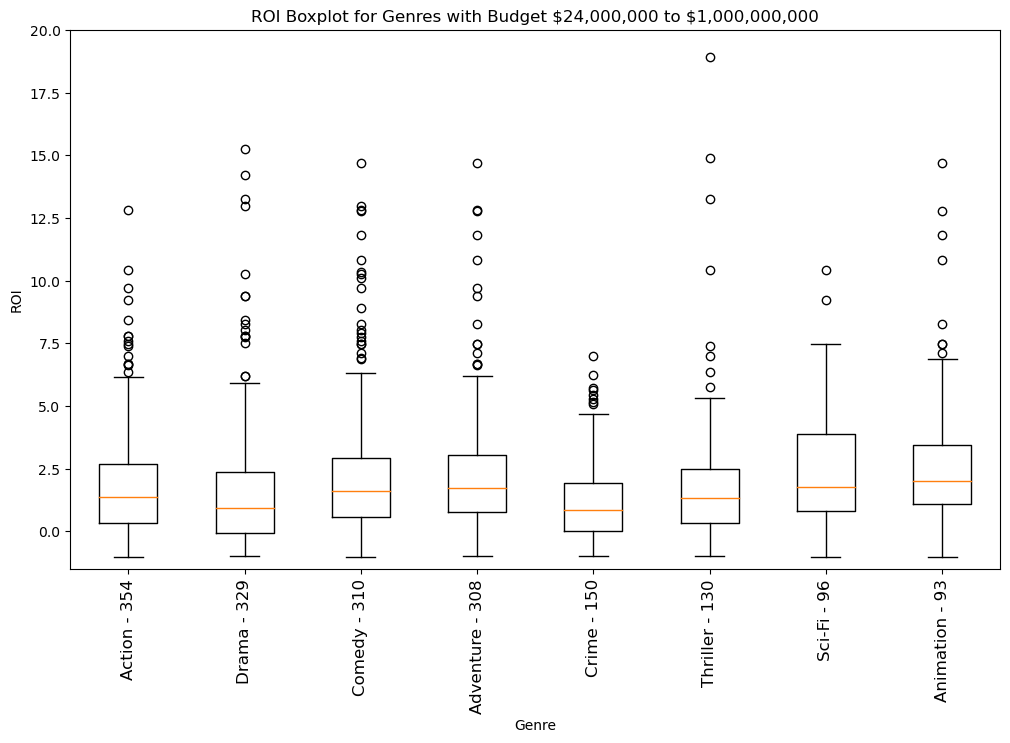

In [6]:
produce_boxplot(master_df, 2.4e7, 1e9, 90, (-1.5,20), fig_file_name='ROI_genre_boxplot_24M_to_max.png')

#### Genre vs. ROI boxplots for \\$10M to \\$3B range with min 120 movies/genre

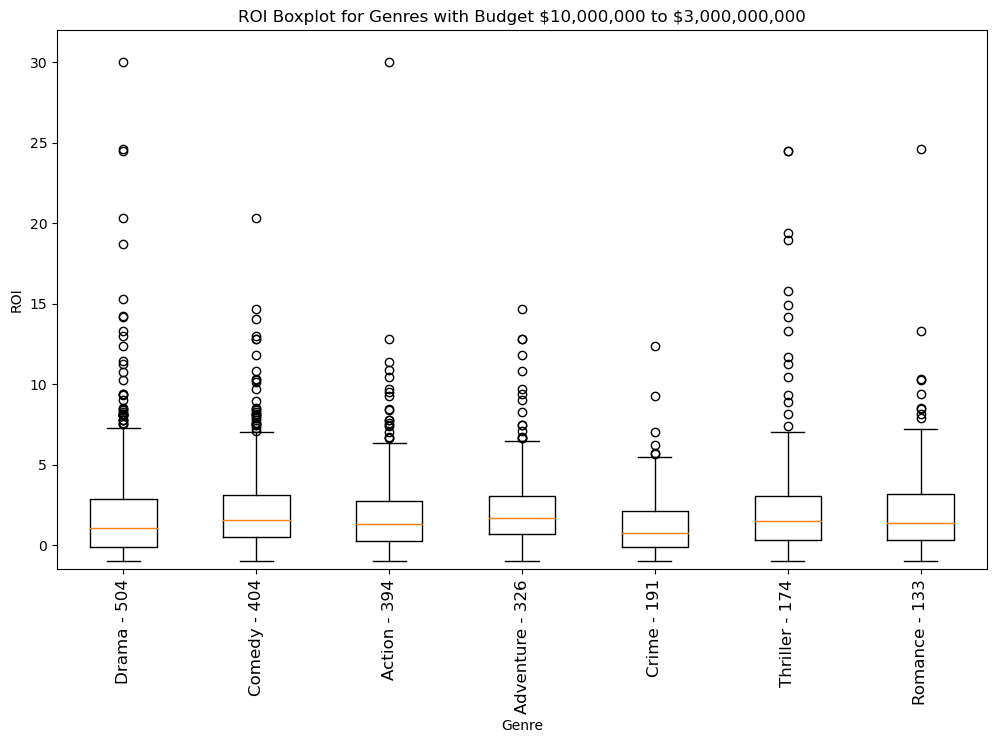

In [7]:
produce_boxplot(master_df, 1e7, 3e9, 120, (-1.5, 32))

## Boxplot of revenue vs. genre for the top 10 genres

In [8]:
# Making list of genre names
genre_names = no_duplicates_df.columns.tolist()[10:]

genre_vals = []
for g in genre_names:
    genre_vals.append(no_duplicates_df[no_duplicates_df[g] == True]['worldwide_gross'].sum())

# Creating x and y axis names for genre gross and name
x_axis = []
y_axis = []

for val, name in sorted(zip(genre_vals, genre_names), reverse=True):
    x_axis.append(name)
    y_axis.append(val)
    
# Creating dataframe of only genre and worldwide gross
total_gross_per_genre = pd.DataFrame({'genre':x_axis, 'total_worldwide_gross':y_axis})

/var/folders/0p/msp7yhvj27b6jw1zk7nsnyl80000gn/T/ipykernel_12552/1880075389.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  bar.set_yticklabels(ylabels)


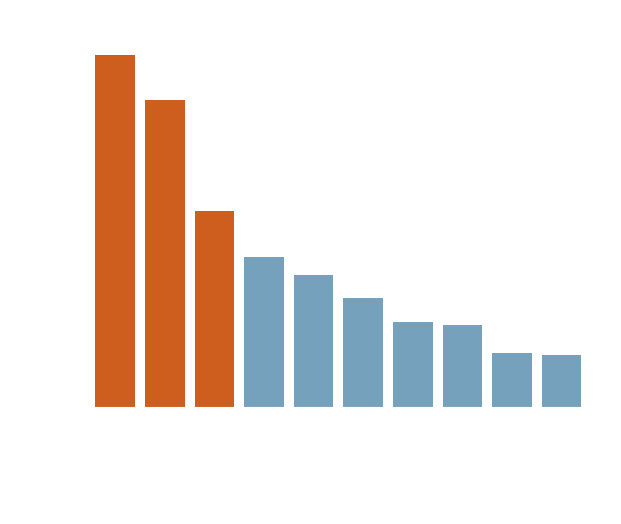

In [9]:
# Setting a style that works well for setting a figure that is ready to present (not easily visible here)
# If wanting to see the axes style information dict    -->   print(sns.axes_style())
sns.set_style(rc={'axes.edgecolor': 'w','text.color': 'w','xtick.color': 'w','ytick.color': 'w', 'axes.labelcolor':'w'})



# Creating barplot of total worldwide gross vs. genre
bar = sns.barplot(data=total_gross_per_genre.iloc[:10], x = 'genre', y='total_worldwide_gross', 
                  palette = ['#eb5600', '#eb5600', '#eb5600', '#6aa4c8', '#6aa4c8', '#6aa4c8', '#6aa4c8',
                            '#6aa4c8', '#6aa4c8', '#6aa4c8'])

# Setting labels titles and tiks
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='center')
ylabels = ['\$' + '{:,.0f}'.format(y/1e9) + 'B' for y in bar.get_yticks()]
bar.set_yticklabels(ylabels)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Total Worldwide Gross', fontsize=15)
plt.title('Worldwide Gross Revenue of Top 10 Genres', fontsize=18)

# Showing and saving the plots
fig = bar.get_figure()
fig.savefig('gross_rev_bar.png', transparent=True, bbox_inches='tight', pad_inches=.15, dpi=300)

## Creating scatterplots and getting correlations for ROI vs. budget for selected genres in different budget ranges

#### >\\$24M for Action movies

Pearson correlations for Action budget vs. ROI
                           inf_adj_production_budget       ROI
inf_adj_production_budget                   1.000000  0.177493
ROI                                         0.177493  1.000000


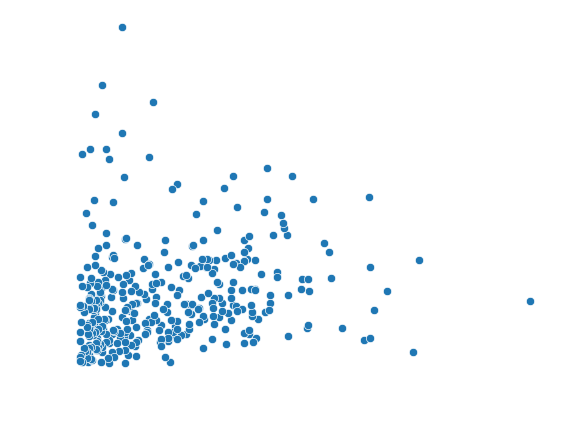

In [10]:
sns.scatterplot(data=no_duplicates_df[(no_duplicates_df['inf_adj_production_budget'] >=2.4e7) & 
                                      (no_duplicates_df['Action'] == True)], x='inf_adj_production_budget', y='ROI')


print('Pearson correlations for Action budget vs. ROI')
print(no_duplicates_df[(no_duplicates_df['inf_adj_production_budget'] > 2.4e7) & (no_duplicates_df['Action'] == True)]
      [['inf_adj_production_budget', 'ROI']].corr(method='pearson'))


#### >\\$24M for Adventure movies

Pearson correlations for Adventure budget vs. ROI
                           inf_adj_production_budget       ROI
inf_adj_production_budget                   1.000000  0.084945
ROI                                         0.084945  1.000000


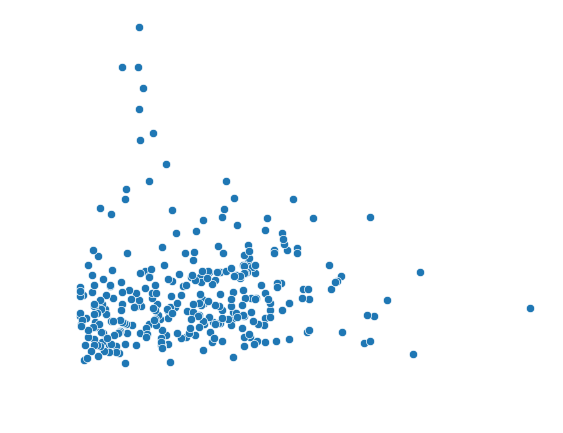

In [11]:
sns.scatterplot(data=no_duplicates_df[(no_duplicates_df['inf_adj_production_budget'] >=2.4e7) & 
                                      (no_duplicates_df['Adventure'] == True)], x='inf_adj_production_budget', y='ROI')

print('Pearson correlations for Adventure budget vs. ROI')
print(no_duplicates_df[(no_duplicates_df['inf_adj_production_budget'] > 2.4e7) & (no_duplicates_df['Adventure'] == True)]
      [['inf_adj_production_budget', 'ROI']].corr(method='pearson'))



#### >\\$24M for Comedy movies

Pearson correlations for Comedy budget vs. ROI
                           inf_adj_production_budget       ROI
inf_adj_production_budget                   1.000000  0.054319
ROI                                         0.054319  1.000000


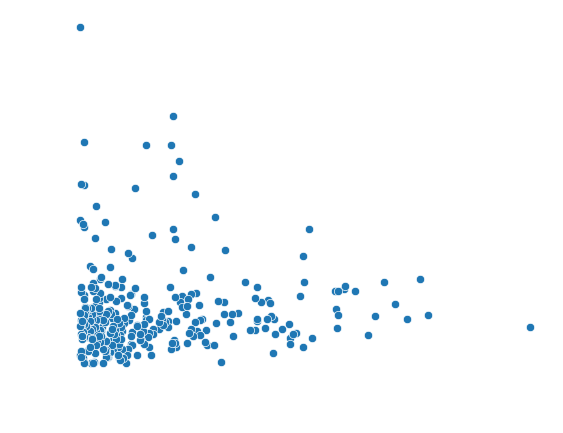

In [12]:
sns.scatterplot(data=no_duplicates_df[(no_duplicates_df['inf_adj_production_budget'] >= 2.4e7) & 
                                      (no_duplicates_df['Comedy'] == True)], x='inf_adj_production_budget', y='ROI')

print('Pearson correlations for Comedy budget vs. ROI')
print(no_duplicates_df[(no_duplicates_df['inf_adj_production_budget'] > 2.4e7) & (no_duplicates_df['Comedy'] == True)]
      [['inf_adj_production_budget', 'ROI']].corr(method='pearson'))


# Pie Chart Revenue Information

Total market between 2010 and 2020 in our dataset:  209357417789
Sum of adventure, action, comedy from 2010 to 2020: 59049756132

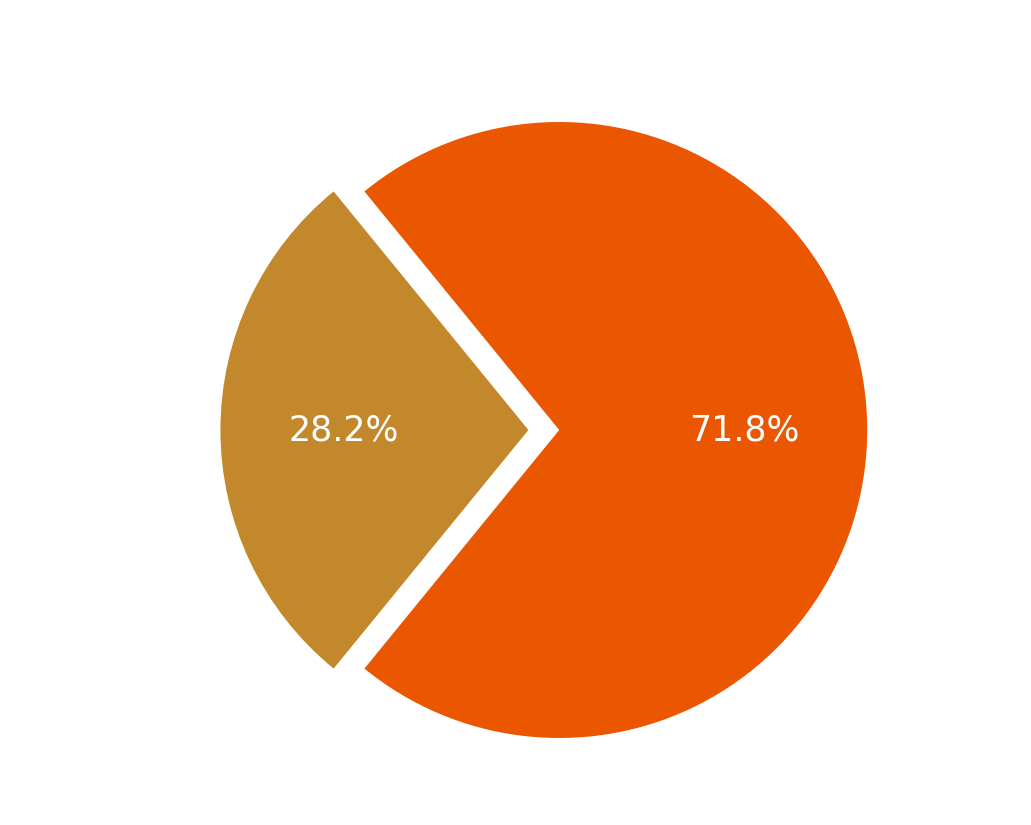

In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np

# make figure and ax objects
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
fig.subplots_adjust(wspace=0)

# large pie chart parameters
ratios = [rest_of_market_revenue/total_market_revenue, act_adv_com_revenue/total_market_revenue]
labels = ['Other\nGenres\n\$150B', 'Action\nAdventure\nComedy\n\$59B']
explode = [0.1, 0]

# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]

# Creating the pie chart
ax.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode, textprops=dict(color="w", size=25), colors=['#eb5600', '#c2882b'])

# Setting title
ax.set_title('Worldwide Revenue Genre Distribution', color='white', size=25)

# Showing and saving the pie chart
plt.show()
fig.savefig('worldwide_revenue_pie_chart.png', transparent=True, bbox_inches='tight', pad_inches=.1, dpi=300)